# Mandy's Wholesales Project

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

enc = LabelEncoder()


scaler = StandardScaler()

In [2]:
# Pull in dataset - 14 total columns, one is unnamed 0 from pulling in csv and two the instructions said to drop 

starterdataset = pd.read_csv("Wholesale customers data.csv")
starterdataset

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
# Check for missing data
nan_count = starterdataset.isna().sum()

print(nan_count)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
#  The instructions recommend dropping Channel and Region
# No missing data found
#Dropping the columns mentioned above
dataset = starterdataset.drop(["Channel", "Region"], axis = 1)
dataset.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
#Let's  learn a bit now about our dataset
dataset.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [6]:
dataset.info() #good they are all numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [7]:
dataset.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\seabo

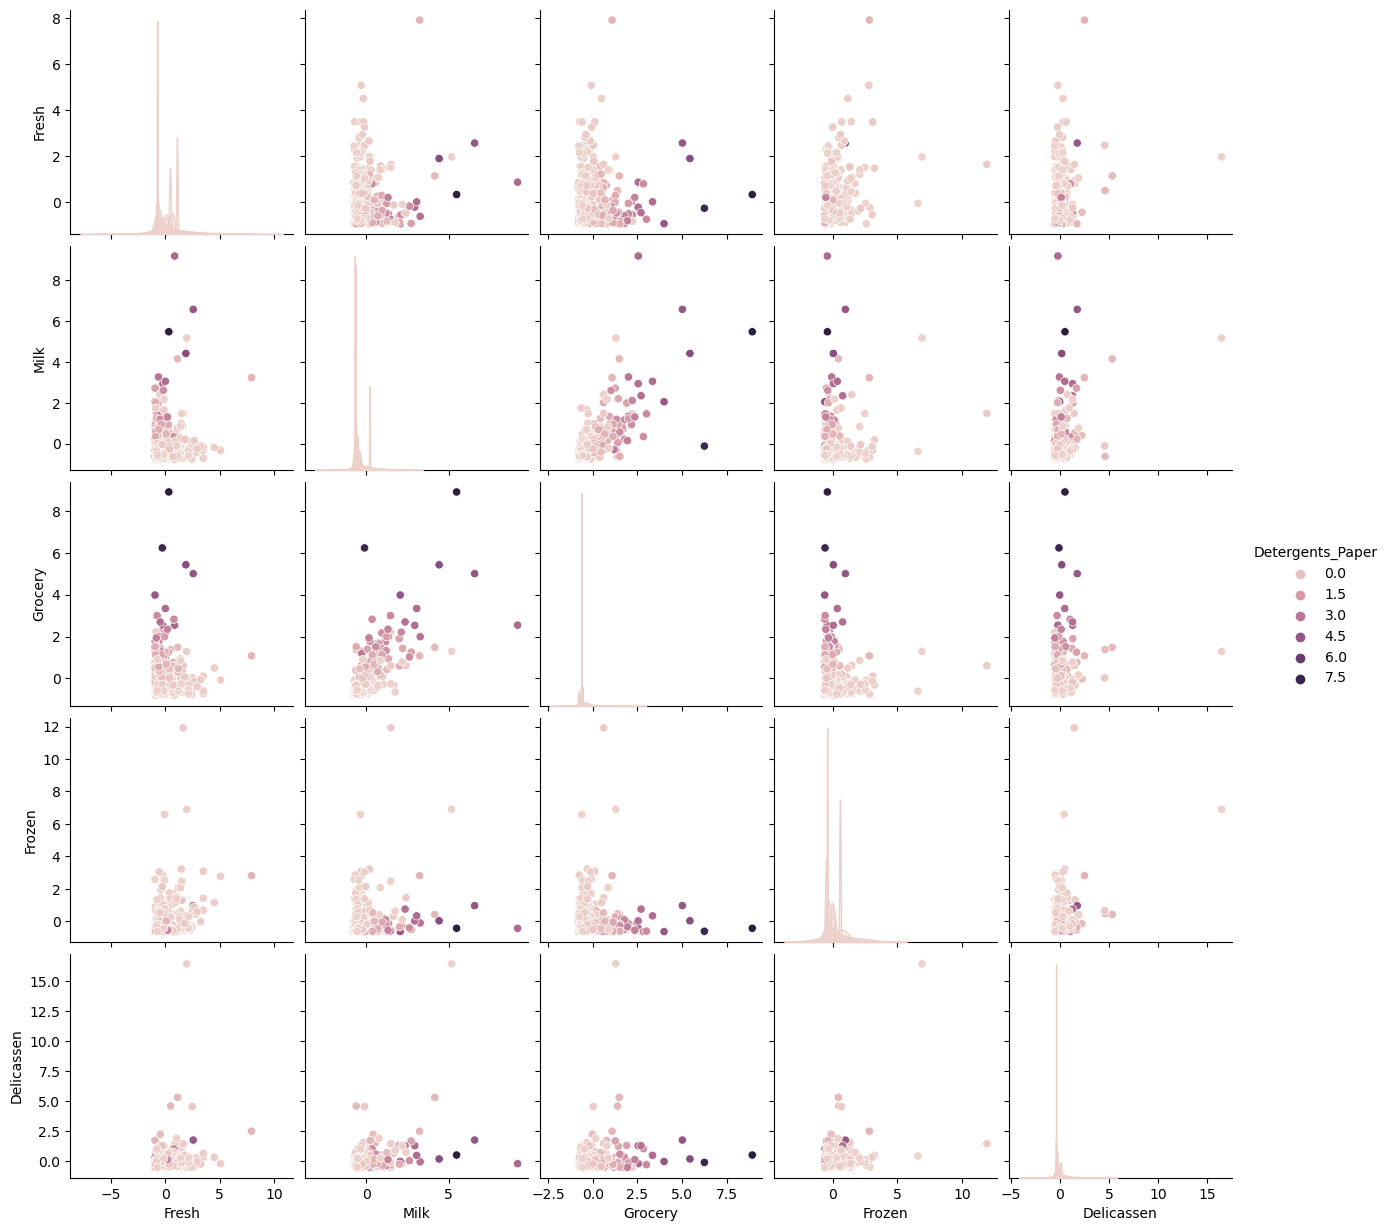

In [18]:
# Let's see a pairplot, i tried a few different choices for Hue but preferred this one, also we can see the detergents_paper and Grocery look like a line
sns.pairplot(data = dataset, hue = ("Detergents_Paper"))
plt.show()


Text(0, 0.5, 'Frozen')

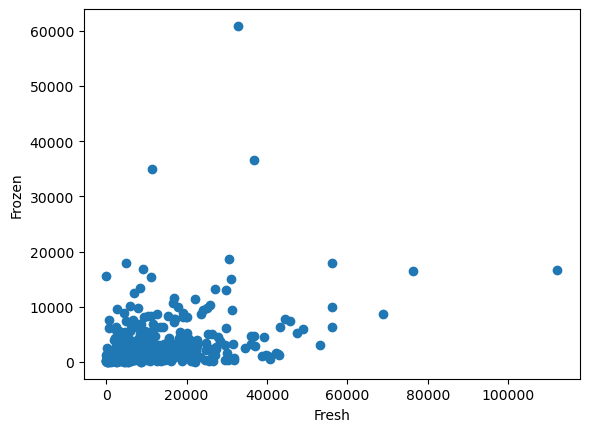

In [13]:
plt.scatter(dataset['Fresh'],dataset['Frozen'])
plt.xlabel('Fresh')
plt.ylabel('Frozen')

In [14]:
#Let's scale, there's no catagorical data  so no need to encode this one.
dataset[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']] = scaler.fit_transform(dataset[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
dataset.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [20]:
#Defining the training  data
x_columns = 6
x = dataset.iloc[:, 0:x_columns].values

In [21]:
#Create our first KMeans model with 5 clusters.
model = KMeans(n_clusters = 5, random_state=0)

In [22]:
# What are we predicting with this model?
## The number used to count off which objects belong in the same group!

y = model.fit_predict(x)
print(y)

C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[3 1 1 3 0 3 3 3 3 1 1 3 0 1 1 3 1 3 3 3 3 3 0 1 1 3 3 3 1 0 3 3 3 0 3 3 0
 1 1 0 0 3 1 1 3 1 1 4 1 1 3 3 0 1 0 3 4 1 3 3 3 4 3 1 3 4 3 1 3 3 0 1 3 0
 3 3 3 1 3 3 3 1 1 3 3 4 4 0 3 0 3 3 4 0 1 3 3 3 3 3 1 1 3 0 3 3 1 1 3 1 3
 1 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 1 3 3
 3 0 3 3 3 3 3 1 1 3 3 1 1 3 3 1 3 1 1 3 3 3 1 1 3 1 3 1 0 3 3 3 3 0 1 2 3
 3 3 3 1 1 3 3 3 1 3 0 0 1 3 3 1 1 0 3 3 1 3 3 3 1 3 4 3 3 1 1 1 3 1 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 1 1 3 3 3 3 3 4 3 0 1 0 3 3 0
 0 3 3 3 3 1 1 1 3 1 3 3 3 3 0 3 3 0 0 3 3 3 3 0 0 0 0 3 3 3 0 3 3 3 1 3 3
 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 0 1 3 3 1 3 3 3 1 3 3 3 3 3 0 3 3 3 3 3 1 3
 4 0 0 3 3 3 3 1 1 3 1 3 3 1 0 3 1 3 1 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 0 0 3 3 3 3 1 0 3 3 0 0 0 3 1 3 3 3 3 3 3 3 3 0 3 3 1 3 3 3 3 0 3 3 3 3 0
 1 3 3 3 3 3 0 3 3 1 3 1 3 1 3 3 3 3 0 1 0 3 3 3 0 3 3 3 0 0 1 3 3]


In [23]:
# Determine the Centroids for visualization
# (The output is the set of coordinates that we can use to visualize the centroid.)

centres = model.cluster_centers_
print(centres)

[[ 1.67032632e+00 -1.07977956e-01 -2.49633515e-01  1.09385904e+00
  -4.17830521e-01  2.58987677e-01]
 [-4.83027024e-01  6.87234312e-01  9.29712635e-01 -3.19705333e-01
   9.12956880e-01  1.61406680e-01]
 [ 1.96681731e+00  5.17550306e+00  1.28721685e+00  6.90059988e+00
  -5.54861977e-01  1.64784475e+01]
 [-2.37815908e-01 -3.79628084e-01 -4.30402618e-01 -1.67549707e-01
  -3.91270763e-01 -1.96169591e-01]
 [ 3.13830315e-01  3.92190593e+00  4.27561037e+00 -3.57419457e-03
   4.61816580e+00  5.03365339e-01]]


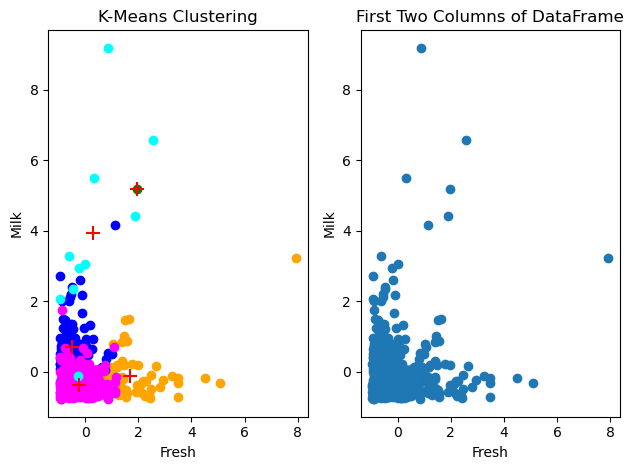

In [28]:

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
colors = ['orange', 'blue', 'green', 'magenta', 'cyan']
for i in range(5):
    plt.scatter(x[y == i, 0], x[y == i, 1], c=colors[i])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='red', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Fresh')
plt.ylabel('Milk')

# Plotting the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1])  # Assuming "data" is your DataFrame
plt.title('First Two Columns of DataFrame')
plt.xlabel(dataset.columns[0])  # Assuming first two columns are Fresh and Milk
plt.ylabel(dataset.columns[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

Text(0, 0.5, 'SSE')

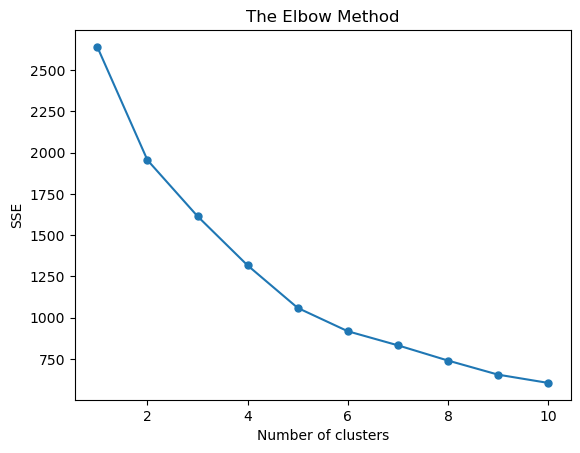

In [29]:
#ok now let's try to find the best.

scores = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(x)
    scores.append(model.inertia_)

plt.plot(range(1, 11), scores, marker='.', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Model Inertia

In [32]:
# Well - it's not super elbowy for an elbow but 6 seems to be where the change in inertia slows so let's visualize with the best
model2 = KMeans(n_clusters=6, random_state=0)
y2 = model2.fit_predict(x)
centres2=model2.cluster_centers_

C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Milk')

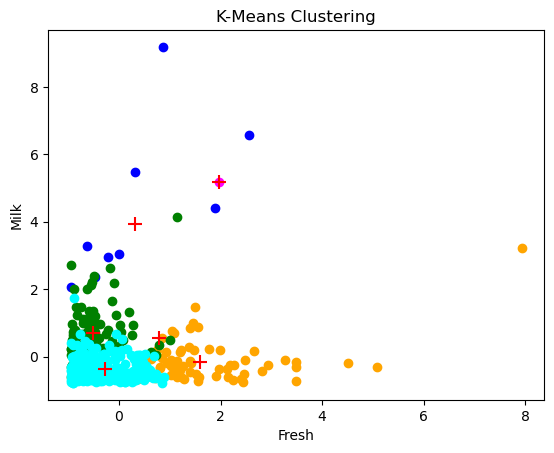

In [36]:
##### colors = ['orange', 'blue', 'green', 'magenta', 'cyan']
for i in range(5):
    plt.scatter(x[y2 == i, 0], x[y2 == i, 1], c=colors[i])
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], color='red', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Fresh')
plt.ylabel('Milk')

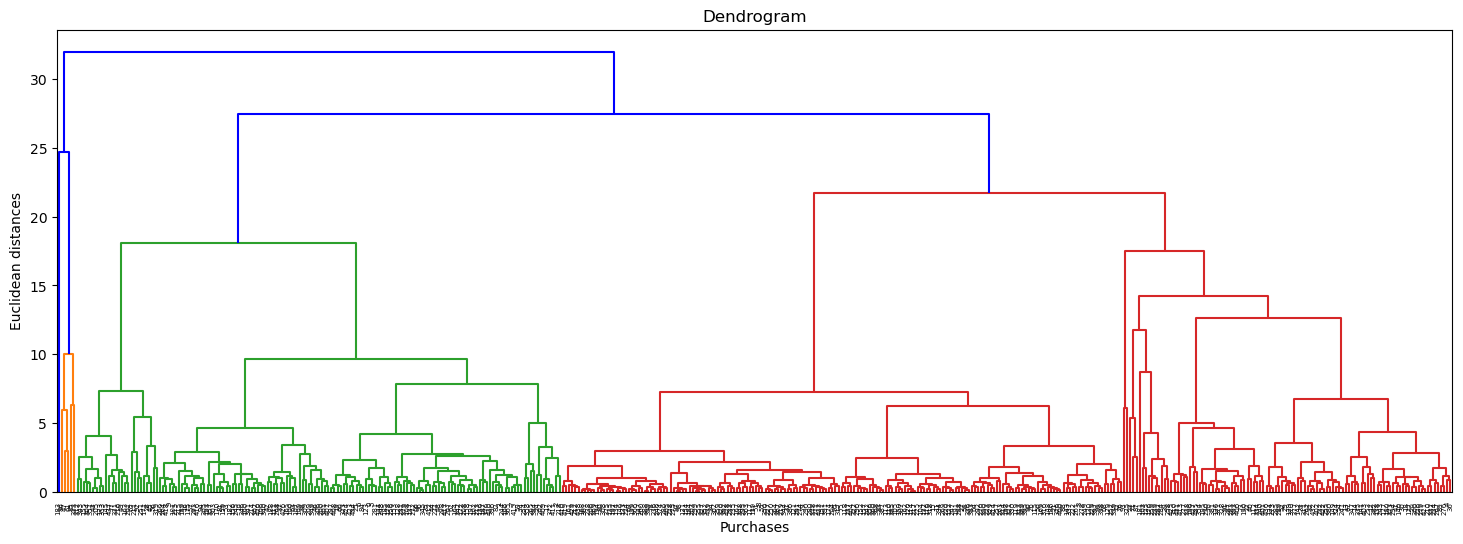

In [43]:
# In  Summary 6 was the best n_cluster for the Milk and Fresh
#  Next we are  doing the challenge ourselves with hierarchical 

#SciPy Dendogram
plt.figure(figsize=(18,6))
plt.title('Dendrogram')
plt.xlabel('Purchases')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(x, method ='ward'),
                            #color_threshold=17, 
                            above_threshold_color='blue') 
plt.show()
